# Results

In [92]:
library('ggplot2')
source('get_expected_pval_and_equiv_z.R')
source('multiplot.R')
source('plot_lib.R')

## 1. Robustness to units mismatch and violation of underlying assumptions

### 1.1 Robustness to unit mismatches

#### One-sample tests

##### Load the data

In [2]:
pattern = '^test1_*btw1_*'

In [3]:
# allsimudat_pval <- read.csv('../../../allsimudat_pval.csv', header=T, sep=" ")
# allsimudat_pval_rank <- read.csv('../../../allsimudat_pval_rank.csv', header=T, sep=" ")
# allsimudat_tval <- read.csv('../../../allsimudat_nopval.csv', header=T, sep=" ")
suffix <- gsub('[^a-zA-Z_0-9]', '', pattern)
csv_file = paste(getwd(), '/../../../data/allsimudat_', suffix,'.csv', sep="")

if (! file.exists(csv_file)){
    print(paste('pattern=', suffix))
    print(paste('CSV file', csv_file,' not found, reprocessing the data.'))
    get_expected_pval_and_equiv_z(pattern)
}

##### Agregate data from all repetitions and experiments

#### Load the data from the CSV file

In [4]:
pattern_btw1 <- '^test1_*btw1_*'
suffix_btw1 <- gsub('[^a-zA-Z_0-9]', '', pattern_btw1)
csv_file_btw1 <- paste(getwd(), '/../../../data/allsimudat_', suffix_btw1,'.csv', sep="")
allsimudat_btw1 <- read.csv(csv_file_btw1, header=T, sep=",")

In [5]:
pattern_btw0 <- '^test1_*btw0_*'
suffix_btw0 <- gsub('[^a-zA-Z_0-9]', '', pattern_btw0)
csv_file_btw0 <- paste(getwd(), '/../../../data/allsimudat_', suffix_btw0,'.csv', sep="")
allsimudat_btw0 <- read.csv(csv_file_btw0, header=T, sep=",")

In [10]:
suffix <- 'test1'
allsimudat <- rbind(allsimudat_btw1, allsimudat_btw0)

In [162]:
# Reorder unit mismatch factor levels
allsimudat$unitMism = factor(allsimudat$unitMism,c('nominal', 'contscl', 'datascl'))

##### Plots

###### Units mismtach

We look how contrast-based methods are affected by the units issue.

In [163]:
con_methods <- c("megaMFX","megaRFX","permutCon", "megaFFX_FSL")
con_data <- subset(allsimudat, is.finite(expectedz) & expectedz>0 &  (allsimudat$methods %in% con_methods) & allsimudat$glm == 1 )

We look at the best case scenario for each contrast-based method:
 - MFX GLM: τ2 ≠ 0 -> τ2 = 1
 - RFX GLM: σ2<<τ2 or σ2 (and n) constant for all studies -> σ2=1/2
 - Contrast Permutation: anything
 - FFX GLM: τ2 = 0

In [164]:
best_con_data <- subset(con_data, 
    ((con_data$methods %in% c("megaMFX","megaRFX","permutCon") & con_data$Between==1) |
    ((con_data$methods %in% c("megaFFX_FSL") & con_data$Between==0))) & 
    con_data$Within==5 & 
    ((con_data$glm == 1 & con_data$nStudies==25) | (con_data$glm > 1 & con_data$nStudies==50)))

Warning message:
“Removed 1393 rows containing missing values (geom_path).”

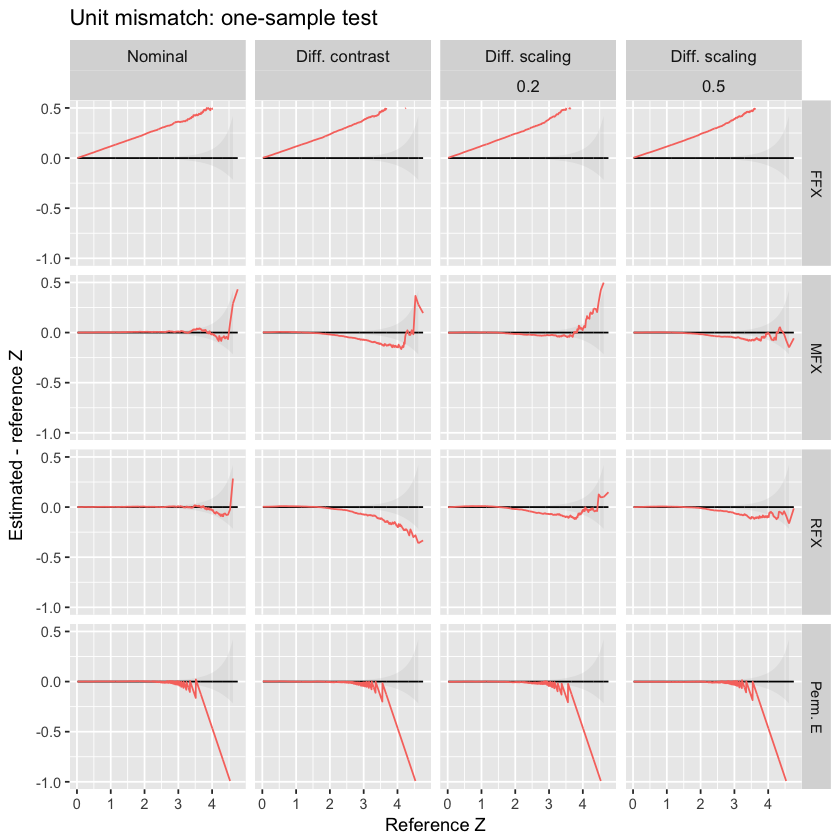

In [166]:
source('plot_lib.R')
plot_unit_mismatch(best_con_data, 'one-sample test', mult=FALSE, single=TRUE)